In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import requests
import matplotlib.pyplot as plt

In [53]:
def dateparse(d,t):
    dt = d + " " + t
    #return pd.datetime.strptime(dt, '%Y-%m-%d %H:%M:%S')
    return pd.datetime.strptime(dt, '%Y-%m-%d %H:%M')

df_bt = pd.read_csv("./Data/Anonymized_BT_Logs_20070903_1833.csv", encoding ='utf8', parse_dates={'datetime': ['Date', 'Time']})

In [54]:
df_bt .columns

Index(['datetime', 'index', 'Address', 'Day', 'Search', 'Session', 'Person'], dtype='object')

In [55]:
# exclude dummy addresses 000000000000 and FFFFFFFFFFFF used to denote beginning and end of session
# exclude static devices denoted by the 'AxisBoard' prefix in Person or Search =0

df_bt = df_bt[ ~(
                (df_bt['Address'].isin(['000000000000','FFFFFFFFFFFF'])) 
                | (df_bt['Person'].str.startswith('AxisBoard', na=False))
                | (df_bt['Search'] == 0)
            )]

In [59]:
df_bt.head()

,datetime,index,Address,Day,Search,Session,Person,min
1,2005-10-31 17:10:31,2,96dbec31c17d68e38ec48406ffa99a8d,Mon,1,1,c6c5992d7d4c0d51827a56e3dff9f310,2005-10-31 17:10
2,2005-10-31 17:10:59,3,96dbec31c17d68e38ec48406ffa99a8d,Mon,2,1,c6c5992d7d4c0d51827a56e3dff9f310,2005-10-31 17:10
3,2005-10-31 17:11:29,4,96dbec31c17d68e38ec48406ffa99a8d,Mon,3,1,c6c5992d7d4c0d51827a56e3dff9f310,2005-10-31 17:11
4,2005-10-31 17:12:00,5,96dbec31c17d68e38ec48406ffa99a8d,Mon,4,1,c6c5992d7d4c0d51827a56e3dff9f310,2005-10-31 17:12
5,2005-10-31 17:12:30,6,96dbec31c17d68e38ec48406ffa99a8d,Mon,5,1,c6c5992d7d4c0d51827a56e3dff9f310,2005-10-31 17:12


In [70]:
df_bt.shape

(352875, 8)

In [58]:
#round to nearest minute
df_bt['min'] = df_bt['datetime'].apply(lambda x: x[0:16])

In [62]:
df_bt_mins = df_bt[['Address','Person','min','Session']].groupby(['Address','Person','min']).count().reset_index()

In [65]:
df_bt_mins['contact_minutes'] = df_bt_mins.groupby(['Address','Person']).cumcount()

In [66]:
df_bt_mins.head()

,Address,Person,min,Session,contact_minutes
0,00095916f5f9dff6ba342a4e0b14e7db,a0044ebb6b9f2077f46f7c084b5ee14d,2006-03-08 19:55,2,0
1,00095916f5f9dff6ba342a4e0b14e7db,a0044ebb6b9f2077f46f7c084b5ee14d,2006-03-08 19:56,2,1
2,000beb34d4f813893b91087c1ad34c75,968d5801ab6ecb6c56163b6661725044,2005-12-19 13:14,3,0
3,000beb34d4f813893b91087c1ad34c75,968d5801ab6ecb6c56163b6661725044,2005-12-19 13:15,1,1
4,000f10d5e5e54d675d73ce1d7949a45f,a0044ebb6b9f2077f46f7c084b5ee14d,2006-03-14 09:06,1,0


In [71]:
# Assume 5 min contact required for contageon (the rest pass by on street etc) - check papers
df_contacts = df_bt_mins[df_bt_mins['contact_minutes'] ==5][['Address','Person', 'min']]

In [72]:
df_contacts.shape

(2661, 3)

In [86]:
df_contacts.head()

,Address,Person,min,virus_confirmed
14,002a96b9ab183c7bd363e97442781e68,c6c5992d7d4c0d51827a56e3dff9f310,2006-02-06 14:41,2000-01-01
43,0079f0341235e157a3945a9e0412e29e,b145ab13daaa36216c5790a0df819460,2005-10-30 21:31,2000-01-01
57,007bca84880aabf9dbb6ab5ef3c6e017,968d5801ab6ecb6c56163b6661725044,2006-02-09 15:24,2000-01-01
137,00857ad6e35fc79f30b62a228331791a,a0044ebb6b9f2077f46f7c084b5ee14d,2006-04-20 17:11,2000-01-01
145,0095308ac935b575a6900bff9576583f,b145ab13daaa36216c5790a0df819460,2006-03-12 23:20,2000-01-01


In [75]:
df_contacts['virus_confirmed'] = pd.Timestamp('2000-01-01')

In [78]:
G = nx.from_pandas_edgelist(df_contacts, 'Address', 'Person', edge_attr=True)

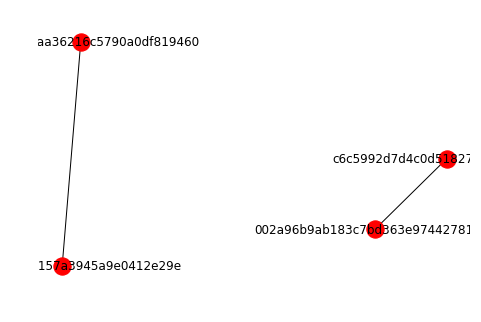

In [89]:
nx.draw(G.subgraph(['002a96b9ab183c7bd363e97442781e68', '0079f0341235e157a3945a9e0412e29e','c6c5992d7d4c0d51827a56e3dff9f310','b145ab13daaa36216c5790a0df819460']), with_labels=True)
plt.show()

## Algorithm to trace recent contacts

In [ ]:
# create sub-graph, filter by time edge property

## Test Server accepts files

In [39]:
files = {'file': open('./Data/gpx_sample_london_park/2894941169.gpx', 'rb')}
r = requests.post('http://95.216.149.106:8000/uploadfile/',  files=files)

In [41]:
r.json()

{'filename': '2894941169.gpx'}

In [ ]:
files = {'file': open('./Data/gpx_sample_london_park/2894941169.gpx', 'rb')}
r = requests.post('http://95.216.149.106:8000/uploadfile/',  files=files)